In [2]:
import sys
sys.path.append("../src")

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
from sklearn.metrics import r2_score
import seaborn as sns

from lib.pipeline import get_preprocessors, reduce_dimension, detect_outliers

from lib.i_o import read_csv

In [3]:
df_x_train = read_csv("X_train.csv", "../data/")
df_y_train = read_csv("y_train.csv", "../data/")

Read data from ../data/X_train.csv
Read data from ../data/y_train.csv


In [4]:
print(f"#Features: {df_x_train.shape[1]}\n#observations: {df_x_train.shape[0]}")

#Features: 833
#observations: 1212


In [5]:
df_y_train['y'].describe()

count    1212.000000
mean       69.889439
std         9.720843
min        42.000000
25%        64.000000
50%        70.000000
75%        77.000000
max        97.000000
Name: y, dtype: float64

/home/bjn/PycharmProjects/predicting_age/venv/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='y'>

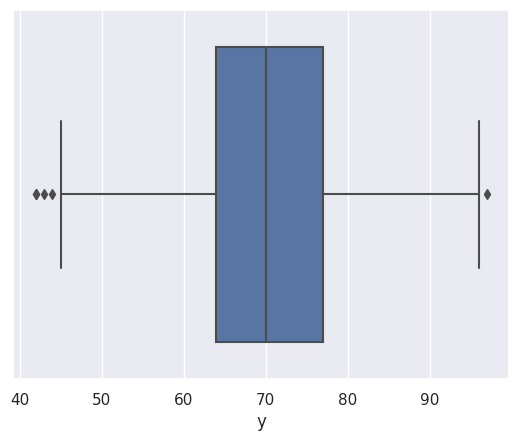

In [6]:
sns.boxplot(df_y_train['y'])

<Axes: xlabel='Count', ylabel='y'>

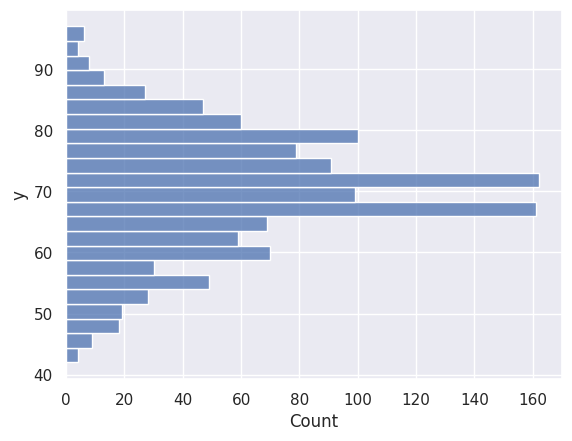

In [7]:
sns.histplot(data=df_y_train, y='y')

In [13]:
np.quantile(df_y_train['y'], [0.25, 0.5, 0.75, 0.8, 0.9, 0.95, 0.99])

array([64.  , 70.  , 77.  , 78.  , 82.  , 85.  , 91.89])

In [8]:
df_x_train['y'] = df_y_train['y']

In [9]:
from sklearn.impute import SimpleImputer
df_impute_before = df_x_train.drop(columns='id')

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(df_impute_before)
df_x_train_imputed = pd.DataFrame(imp.transform(df_impute_before))

In [10]:
df_x_train_imputed.describe()

,0,1,2,3,4,5,6,7,8,9,...,823,824,825,826,827,828,829,830,831,832
count,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,...,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000,1212.000000
mean,15220.402957,10950.160761,3430.837498,100002.281022,105.070358,99.968855,9983.055476,10496.207179,10495.835570,9.985880,...,13274.793928,812.316152,104.968652,105.063790,2482.685073,2.725659,1359.981226,1052.256384,9981.085085,69.889439
std,2226.067754,1515.160528,427.016139,9336.184837,2.746611,9.248719,941.082486,267.218490,278.729862,0.958969,...,2084.004479,173.323959,2.692260,2.688044,500.922343,0.253089,255.066942,28.192174,973.447237,9.720843
min,5636.623777,6764.060541,1849.453269,65828.916291,100.056578,70.232469,6797.836298,10000.771287,10000.339782,6.759685,...,4100.700865,164.997735,100.040624,100.015930,750.038434,1.590647,663.173673,1000.067137,6383.771227,42.000000
25%,13931.809724,9926.530547,3170.385944,94358.738184,102.811093,94.195727,9428.209799,10284.999365,10263.060018,9.375400,...,12076.791406,702.078405,102.864339,102.902380,2181.823042,2.557012,1194.652957,1030.447895,9382.893669,64.000000
50%,15220.402957,10950.160761,3430.837498,100002.281022,105.070358,99.968855,9983.055476,10496.207179,10495.835570,9.985880,...,13274.793928,809.042463,104.968652,105.063790,2482.685073,2.725659,1359.981226,1052.256384,9981.085085,70.000000
75%,16485.603116,11751.038613,3668.158481,105531.874497,107.353976,105.397439,10491.489465,10700.871543,10718.409364,10.606376,...,14431.290607,911.343060,106.993646,107.185396,2743.530473,2.868703,1517.190330,1076.100611,10584.942325,77.000000
max,28273.690135,17777.338221,5622.951648,133145.632257,110.087261,130.142499,13865.848591,11000.062311,10999.403374,13.828922,...,24901.251674,1589.225040,110.072565,110.069056,4904.988601,3.795277,2506.104650,1099.975679,13265.026039,97.000000


In [11]:
df_embedding = reduce_dimension(X_train_imputed)
df_embedding['y'] = y_train_scaled_imputed
df_embedding.head()

NameError: name 'X_train_imputed' is not defined

In [ ]:
import seaborn as sns 
sns.scatterplot(x=0, y=1, data=df_embedding, hue='is_inlier');

In [ ]:
# Join out / inlier column
is_inlier = detect_outliers(df_embedding)
df_embedding["is_inlier"] = is_inlier
X_train_imputed = pd.DataFrame(X_train_imputed)
X_train_imputed['is_inlier'] = is_inlier

In [ ]:
# Join y column
df_x_train_imputed['id'] = df_x_train['id']
df_x_train_imputed = df_x_train_imputed.merge(df_y_train, how='left', left_on='id', right_on='id')

In [ ]:
# Remove outliers
df_x_train_inliers = df_x_train_imputed[df_x_train_imputed['is_inlier']].drop(columns=['id', 'is_inlier', 'isof_cat'])

In [ ]:
# Prepare data for splitting
X = df_x_train_inliers.drop(columns='y')
y = df_x_train_inliers['y']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=1) 

In [ ]:
# Standardize features
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [ ]:
pd.DataFrame(X_train_scaled).head()

In [ ]:
pd.DataFrame(X_train_scaled).describe()